This dataset contains data of an insurance company provided by Onyx data.

* **marital_status**: Gives information about the marital status of customers; married, single,divorced, seperated.
* **Car_use**: Gives information about the purpose of the car if it is for commercial use or private.
* **gender**: Gives information about the the gender of the customers male or female.
* **Parent**: If a customer is a parent or not.
* **Education**: Gives information about the level of education of the customers.
* **car_make**: Gives information about which car manufacturer a customrr is using e.g Acura, Nissan.
* **car_year**: Gives information about year the car came out.
* **car_color**: Gives information about the color of the car
* **claim_freq**: Gives information about the number of times a customer has claimed insurance.
* **coverage_zone**: Gives information about the area in which the service is being provided; urban,suburban, rural, highly urban and highly rural
* **claim_amt**: Gives information about amount of monry to be claimed by the customer.
* **household_income**: Gives information about income of the customers


In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from datetime import datetime
from datetime import timedelta
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [2]:
#import data
car = pd.read_csv("car insu.csv")
car.head()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income
0,62-2999778,09/08/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43
2,08-3808219,08/03/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70
3,38-0306843,10/05/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23


In [3]:
car[car.duplicated()]

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income


In [4]:
#checking for null values
car.isnull().sum()

ID                  0
birthdate           0
marital_status      0
car_use             0
gender              0
kids_driving        0
parent              0
education           0
car_make            0
car_model           0
car_color           0
car_year            0
claim_freq          0
coverage_zone       0
claim_amt           0
household_income    0
dtype: int64

In [5]:
#getting the year of birth in a column
car['birth']= car['birthdate'].str[-4:]
car.head()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth
0,62-2999778,09/08/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66,1962
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43,1988
2,08-3808219,08/03/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70,1999
3,38-0306843,10/05/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61,1959
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23,1992


In [6]:
car['date']=pd.Series(2023, index=car.index)
car.head()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth,date
0,62-2999778,09/08/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66,1962,2023
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43,1988,2023
2,08-3808219,08/03/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70,1999,2023
3,38-0306843,10/05/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61,1959,2023
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23,1992,2023


In [7]:
#getting the age of the customers
car['birth']= car['birth'].astype(int)
car['Age']=car['date'] - car['birth']
car.head()

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth,date,Age
0,62-2999778,09/08/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66,1962,2023,61
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43,1988,2023,35
2,08-3808219,08/03/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70,1999,2023,24
3,38-0306843,10/05/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61,1959,2023,64
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23,1992,2023,31


## Distribution of customers 

In [8]:
pd.value_counts(car['gender'].values)

C:\Users\USER\AppData\Local\Temp\ipykernel_10656\1517447351.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(car['gender'].values)


Female    18806
Male      18736
Name: count, dtype: int64

In [9]:
pd.value_counts(car['education'].values)

C:\Users\USER\AppData\Local\Temp\ipykernel_10656\401739973.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(car['education'].values)


Bachelors      18701
High School    10439
Masters         5640
PhD             2762
Name: count, dtype: int64

In [10]:
pd.value_counts(car['marital_status'].values)

C:\Users\USER\AppData\Local\Temp\ipykernel_10656\642192597.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(car['marital_status'].values)


Single       15525
Married      12570
Divorced      6357
Seperated     3090
Name: count, dtype: int64

In [11]:
pd.value_counts(car['parent'].values)

C:\Users\USER\AppData\Local\Temp\ipykernel_10656\2951885800.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(car['parent'].values)


No     20932
Yes    16610
Name: count, dtype: int64

In [12]:
pd.value_counts(car['car_make'].values)

C:\Users\USER\AppData\Local\Temp\ipykernel_10656\613148823.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(car['car_make'].values)


Ford          3302
Chevrolet     2954
Dodge         1843
Toyota        1809
GMC           1751
              ... 
MG               5
Fillmore         5
Rambler          5
Hillman          3
Fairthorpe       2
Name: count, Length: 78, dtype: int64

In [13]:
pd.value_counts(car['car_color'].values)

C:\Users\USER\AppData\Local\Temp\ipykernel_10656\2701362014.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(car['car_color'].values)


Turquoise     2078
Aquamarine    2020
Green         2016
Pink          2011
Blue          2002
Khaki         1993
Crimson       1990
Violet        1989
Yellow        1983
Teal          1977
Fuscia        1974
Red           1961
Maroon        1954
Puce          1947
Purple        1942
Indigo        1941
Goldenrod     1935
Orange        1915
Mauv          1914
Name: count, dtype: int64

In [14]:

pd.value_counts(car['car_use'].values)

C:\Users\USER\AppData\Local\Temp\ipykernel_10656\1525260773.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(car['car_use'].values)


Private       30060
Commercial     7482
Name: count, dtype: int64

In [15]:
pd.value_counts(car['claim_freq'].values)

C:\Users\USER\AppData\Local\Temp\ipykernel_10656\2518316413.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(car['claim_freq'].values)


0    27203
1     5912
3     1516
2     1473
4     1438
Name: count, dtype: int64

In [16]:
average=car['claim_amt'].mean()
print("Average claim amount:" ,average)

Average claim amount: 50028.51409621224


In [17]:
average=car['household_income'].mean()
print("Average household income:" ,average)

Average household income: 147247.4077497203


## Exploring the claim frequencies based on different demographics

In [18]:
#what is the average claim amount?
average=car['claim_freq'].mean()
print("Average claim frequency:" ,average)

Average claim frequency: 0.5103084545309253


### Claim frequency by gender and marital status

In [19]:
#group by gender and marital status
claims= car.groupby(['gender', 'marital_status'])['claim_freq'].mean().reset_index()
claims.head(10)

,gender,marital_status,claim_freq
0,Female,Divorced,0.502696
1,Female,Married,0.511632
2,Female,Seperated,0.537201
3,Female,Single,0.516594
4,Male,Divorced,0.481898
5,Male,Married,0.528799
6,Male,Seperated,0.529920
7,Male,Single,0.493174


<Figure size 800x1000 with 0 Axes>

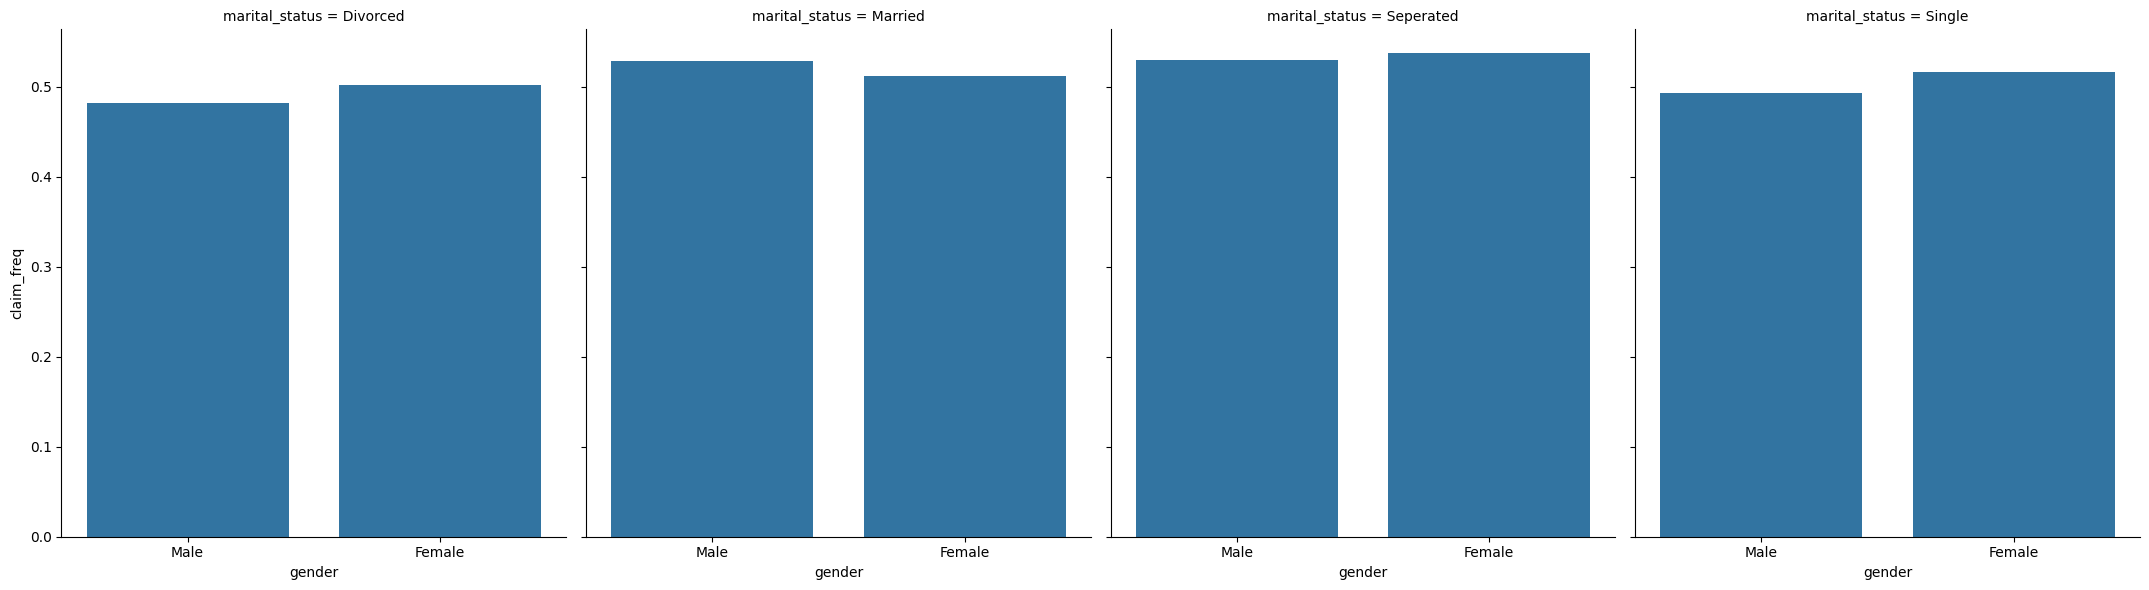

In [20]:
plt.figure(figsize=(8,10))
x= sns.FacetGrid(claims ,col='marital_status', height=6, aspect=.9)
x.map(sns.barplot,'gender' ,'claim_freq', order=['Male','Female'])
plt.show()


#### Women who are single, seperated, divorced have a slightly higher claim frequency than men whie only married men have a higher claim frequency that women

In [21]:
# claim frequency grouped by parental status
parent= car.groupby(['parent'])['claim_freq'].mean().reset_index()
parent.head(10)

,parent,claim_freq
0,No,0.510032
1,Yes,0.510656


Text(0.5, 1.0, 'Claim freq by Education')

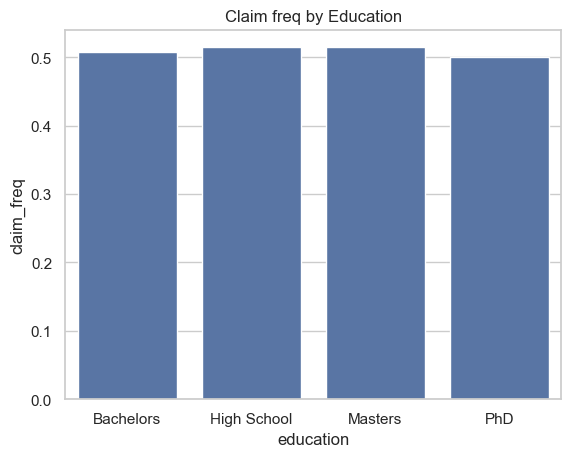

In [22]:
#group by level of education
edu= car.groupby(['education'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
sns.barplot(x='education', y='claim_freq', data=edu)
plt.title('Claim freq by Education')

Text(0.5, 1.0, 'Claim freq by coverage_zone')

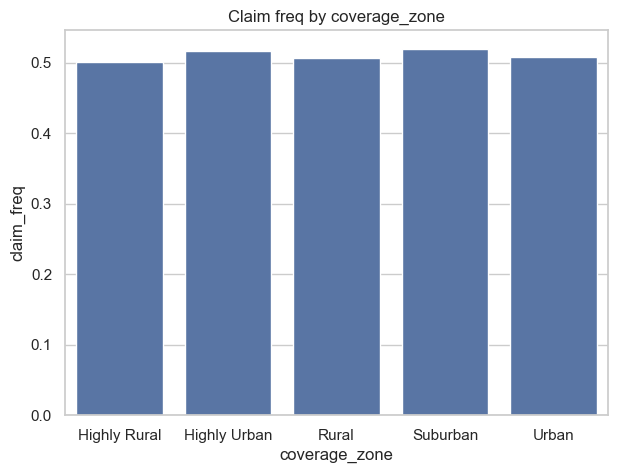

In [23]:
#group claim frequencyby coverage zone
cov= car.groupby(['coverage_zone'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(7,5))
sns.barplot(x='coverage_zone', y='claim_freq', data=cov)
plt.title('Claim freq by coverage_zone')

#### Customers in the highly urban and highly rural areas have a slightly higher claim fequency than the other zones

Text(0.5, 1.0, 'Claim frequency by car maker')

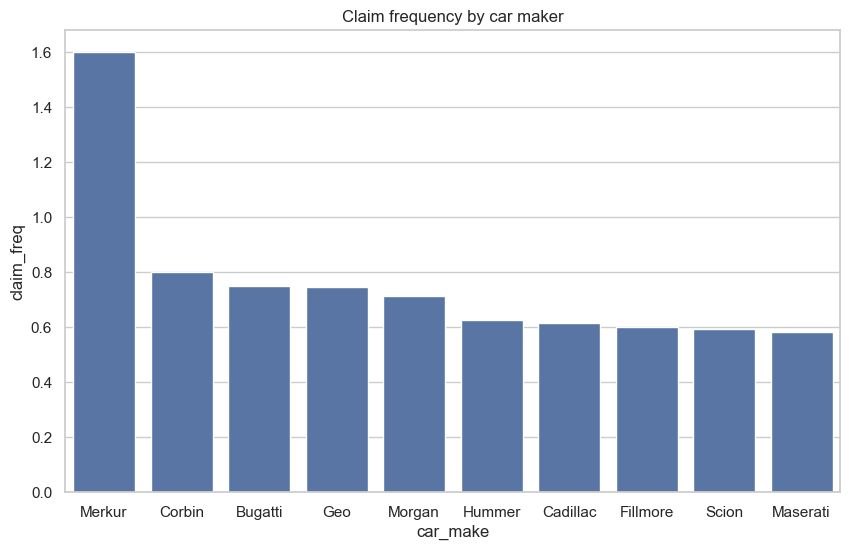

In [24]:
#group by car maker
risk= car.groupby(['car_make'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
top_10=risk.nlargest(10, 'claim_freq')
sns.barplot(x='car_make', y='claim_freq', data=top_10)
plt.title('Claim frequency by car maker')

In [25]:
#filter out the Merkur car maker and look at the various demographics that uses it
carmake= 'Merkur'
filt= car[car['car_make']== carmake]
gend= filt['gender'].value_counts()
gend.head()

gender
Female    3
Male      2
Name: count, dtype: int64

In [26]:
carmake= 'Merkur'
filt= car[car['car_make']== carmake]
gend= filt['household_income'].mean()
print("Average household_income of Merkur owners:" ,gend)

Average household_income of Merkur owners: 160669.61200000002


In [27]:
carmake= 'Merkur'
filt= car[car['car_make']== carmake]
gend= filt['claim_amt'].mean()
print("Average claim amount of Merkur owners:" ,gend)

Average claim amount of Merkur owners: 44354.82


In [28]:
carmake= 'Merkur'
filt= car[car['car_make']== carmake]
zon= filt['education'].value_counts()
zon.head()

education
Bachelors    5
Name: count, dtype: int64

####  Very few customers use the  Merkur(5) and those who do all have a bachelors degree and their average houshold income is significantly higher than the average income of customers generally.

In [29]:
# claim frequency grouped by Car use
parent= car.groupby(['car_use'])['claim_freq'].mean().reset_index()
parent.head(10)

,car_use,claim_freq
0,Commercial,0.498663
1,Private,0.513207


Text(0.5, 1.0, 'Claim frequency by car color')

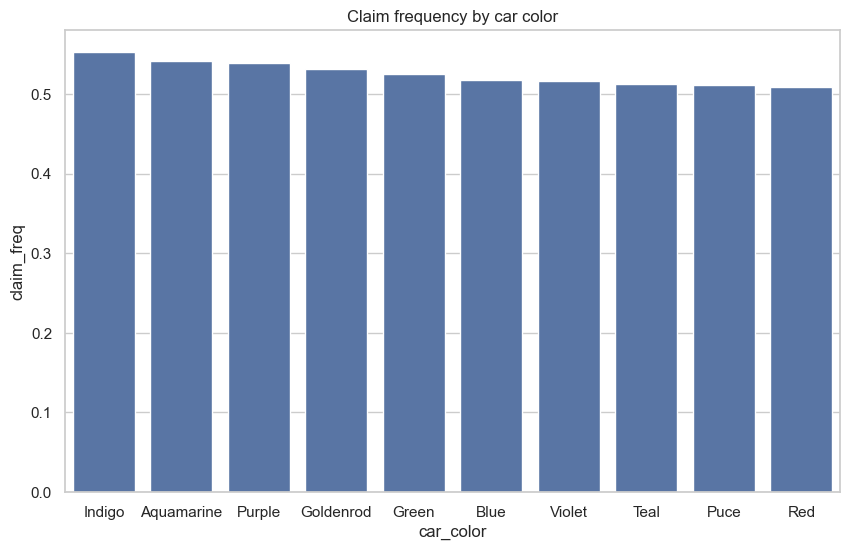

In [30]:
col= car.groupby(['car_color'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
top10=col.nlargest(10, 'claim_freq')
sns.barplot(x='car_color', y='claim_freq', data=top10)
plt.title('Claim frequency by car color')

#### Filter out the Top 3 colors and look at what they are mostly used for; Commercial or private use

In [31]:
 # Indigo
carcol= 'Indigo'
filt= car[car['car_color']== carcol]
zon= filt['car_use'].value_counts()
zon.head()

car_use
Private       1558
Commercial     383
Name: count, dtype: int64

In [32]:
 # Aquamarine
carcol= 'Aquamarine'
filt= car[car['car_color']== carcol]
zon= filt['car_use'].value_counts()
zon.head()

car_use
Private       1654
Commercial     366
Name: count, dtype: int64

In [33]:
# Purple
carcoll= 'Purple'
fillt= car[car['car_color']== carcoll]
zonn= fillt['car_use'].value_counts()
zonn.head()

car_use
Private       1539
Commercial     403
Name: count, dtype: int64

#### It appear they are mainly for private use which makes sense since they are flashy colors and would require frequent maintanance

Text(0.5, 1.0, 'Claim frequency by year of release')

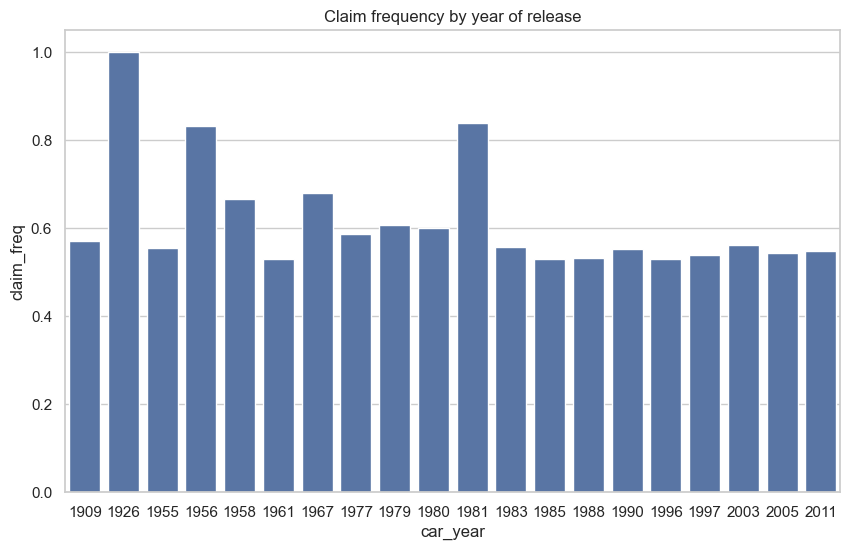

In [34]:
year= car.groupby(['car_year'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
year10=year.nlargest(20, 'claim_freq')
sns.barplot(x='car_year', y='claim_freq', data=year10)
plt.title('Claim frequency by year of release')

In [35]:
# what car make was made in the year 1926
time= 1926
fill= car[car['car_year']== time]
gend= fill['car_make'].value_counts()
gend.head()

car_make
Chrysler    4
Name: count, dtype: int64

In [36]:
#Overview of customers using the chrysler
speci= 1926
fifi= car[car['car_year']== speci]
fifi.head(100)

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth,date,Age
9900,48-2454894,09/11/1993,Divorced,Private,Female,0,No,Bachelors,Chrysler,Imperial,Blue,1926,0,Highly Urban,2705.29,86874.69,1993,2023,30
25777,73-6028144,2/25/1978,Single,Private,Female,0,Yes,High School,Chrysler,Imperial,Mauv,1926,1,Urban,39866.65,117588.19,1978,2023,45
25891,27-0196445,4/25/2002,Single,Private,Male,0,No,Masters,Chrysler,Imperial,Red,1926,0,Rural,15967.83,95325.28,2002,2023,21
35054,73-2983198,2/18/1954,Married,Private,Female,0,No,Bachelors,Chrysler,Imperial,Yellow,1926,3,Highly Rural,51681.91,101849.48,1954,2023,69


Text(0.5, 1.0, 'Claim frequency by Age of customers')

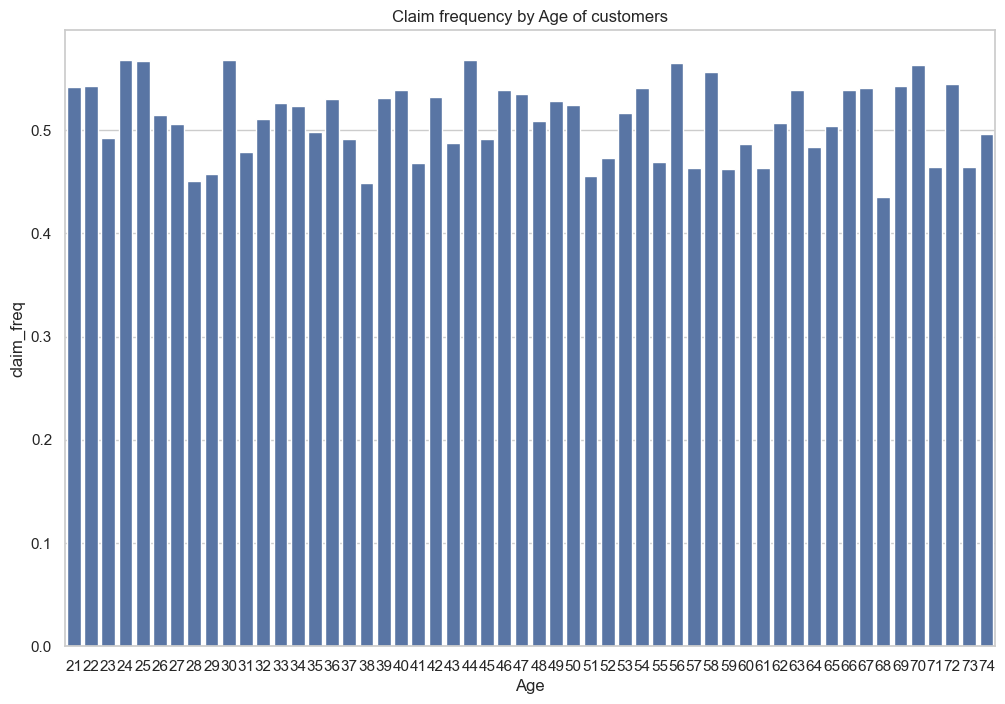

In [37]:
aj= car.groupby(['Age'])['claim_freq'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
sns.barplot(x='Age', y='claim_freq', data=aj)
plt.title('Claim frequency by Age of customers')

### Exploring the Claim Amounts based on different demographics

In [38]:
#what is the average claim amount?
average=car['claim_amt'].mean()
print("Average amount:" ,average)


Average amount: 50028.51409621224


<Figure size 800x1000 with 0 Axes>

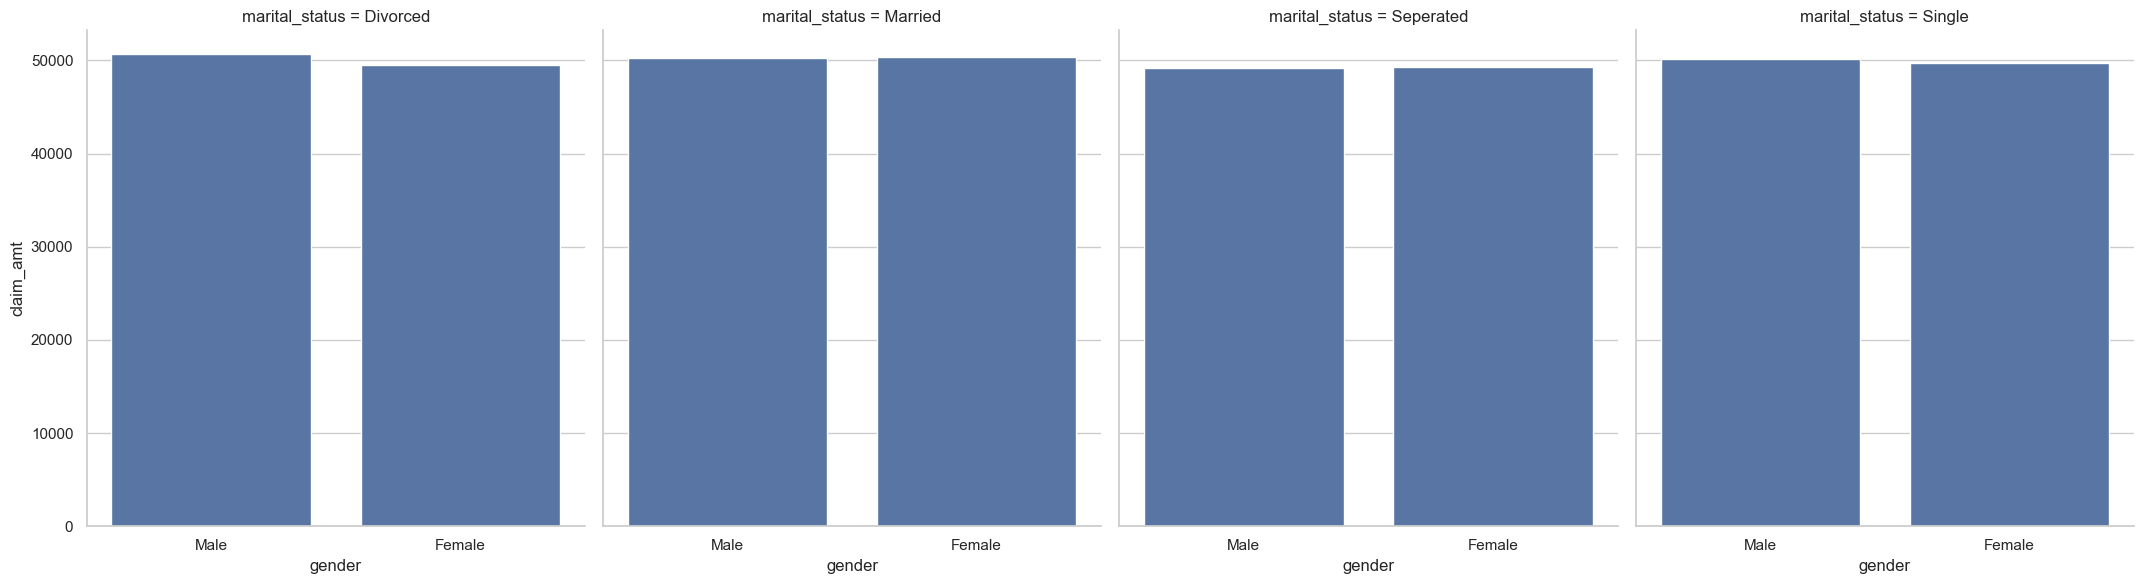

In [39]:
#The claim amounts based on gender and marital status
amts= car.groupby(['gender', 'marital_status'])['claim_amt'].mean().reset_index()
plt.figure(figsize=(8,10))
x= sns.FacetGrid(amts ,col='marital_status', height=6, aspect=.9)
x.map(sns.barplot,'gender' ,'claim_amt', order=['Male','Female'])
plt.show()

#### The claim amount of males who are divorced and single are slightly higher than females whiile the rest are basically the same

Text(0.5, 1.0, 'claim amount by Education')

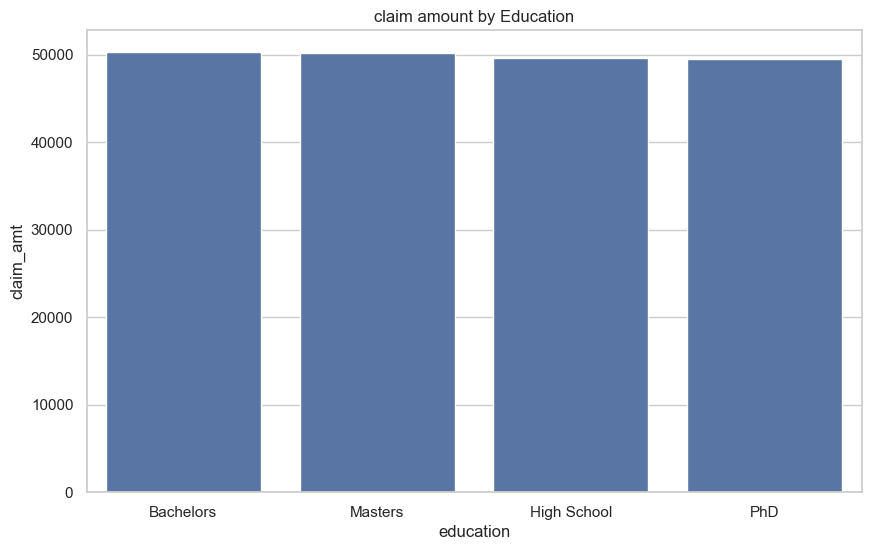

In [40]:
#group claim amount by education
educa= car.groupby(['education' ])['claim_amt'].mean().reset_index()
sort= educa.groupby('education')['claim_amt'].mean().sort_values(ascending=False).index
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x='education', y='claim_amt', data=educa, order=sort)
plt.title('claim amount by Education')

In [41]:
# group by 
reason= car.groupby(['car_use' ])[ 'claim_amt'].mean().reset_index()
reason.head(10)

,car_use,claim_amt
0,Commercial,50005.247874
1,Private,50034.305110


In [42]:
#group by parental status
parents= car.groupby(['parent'])['claim_amt'].mean().reset_index()
parents.head()

,parent,claim_amt
0,No,50084.902634
1,Yes,49957.452996


Text(0.5, 1.0, 'Claim amount by coverage_zone')

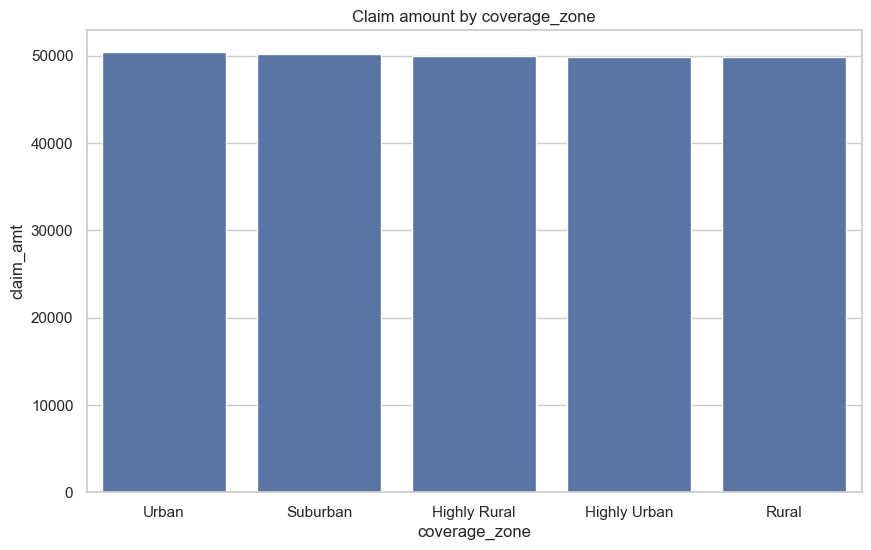

In [43]:
#group claim amount by coverage zone
covv= car.groupby(['coverage_zone'])['claim_amt'].mean().reset_index()
sortt= covv.groupby('coverage_zone')['claim_amt'].mean().sort_values(ascending=False).index
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x='coverage_zone', y='claim_amt', data=covv, order= sortt)
plt.title('Claim amount by coverage_zone')

Text(0.5, 1.0, 'Claim amount by car maker')

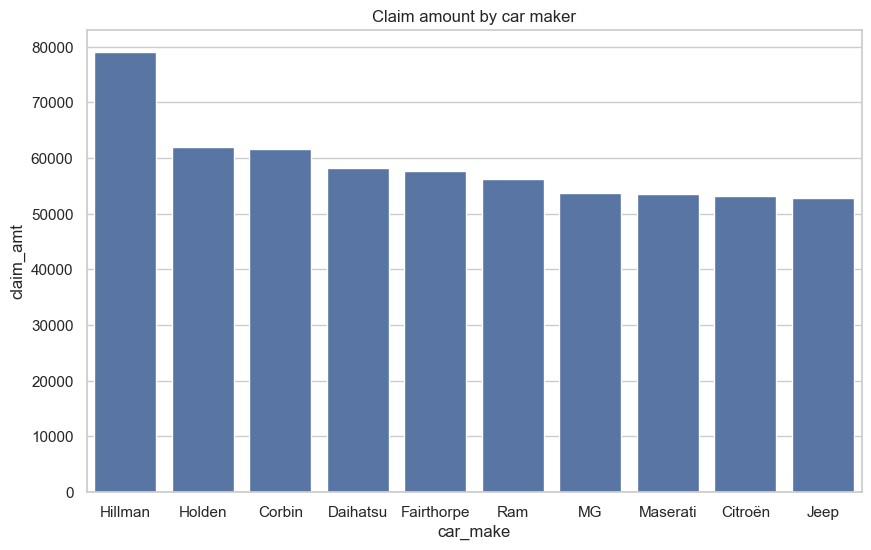

In [44]:
#group by car make
riskk= car.groupby(['car_make'])['claim_amt'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
top_1=riskk.nlargest(10, 'claim_amt')
sns.barplot(x='car_make', y='claim_amt', data=top_1)
plt.title('Claim amount by car maker')

#### Filter out the Top car maker with the highest claim amount that customers use

In [45]:
carmake= 'Hillman'
aim= car[car['car_make']== carmake]
caim= aim['household_income'].mean()
print("Average household_income of Hillman owners:" ,caim)

Average household_income of Hillman owners: 171067.77333333332


In [46]:
carmake= 'Hillman'
aim= car[car['car_make']== carmake]
caim= aim['claim_freq'].mean()
print("Average claim_freq of Hillman owners:" ,caim)

Average claim_freq of Hillman owners: 0.0


#### The average income of 'Hillman' users is signficantly higher than the average income of customers generally and they have an average  claim frequency of 0.0 which means they have never claimed their insurance

In [47]:
#Overview of customers using the Hillman
speci= 'Hillman'
fifi= car[car['car_make']== speci]
fifi.head(100)

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth,date,Age
10382,87-5865221,5/20/1993,Seperated,Commercial,Female,0,No,High School,Hillman,Minx Magnificent,Yellow,1950,0,Rural,68352.98,185192.20,1993,2023,30
23498,71-0538334,01/02/1955,Single,Commercial,Female,0,No,Bachelors,Hillman,Minx Magnificent,Pink,1950,0,Suburban,74486.57,223934.28,1955,2023,68
37148,96-0595357,1/26/1982,Single,Commercial,Female,1,Yes,Bachelors,Hillman,Minx Magnificent,Khaki,1950,0,Suburban,94308.73,104076.84,1982,2023,41


<Axes: xlabel='car_color', ylabel='claim_amt'>

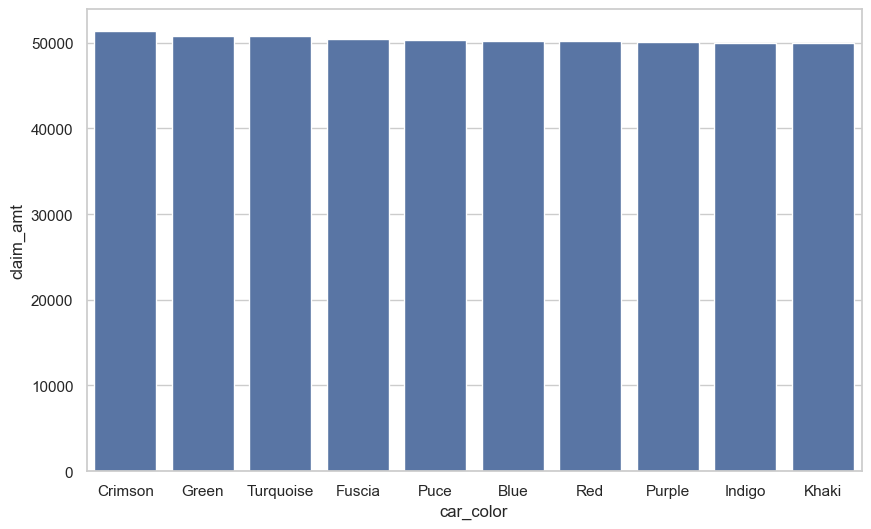

In [48]:
coll= car.groupby(['car_color'])['claim_amt'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
topp=coll.nlargest(10, 'claim_amt')
sns.barplot(x='car_color', y='claim_amt', data=topp)

<Axes: xlabel='Age', ylabel='claim_amt'>

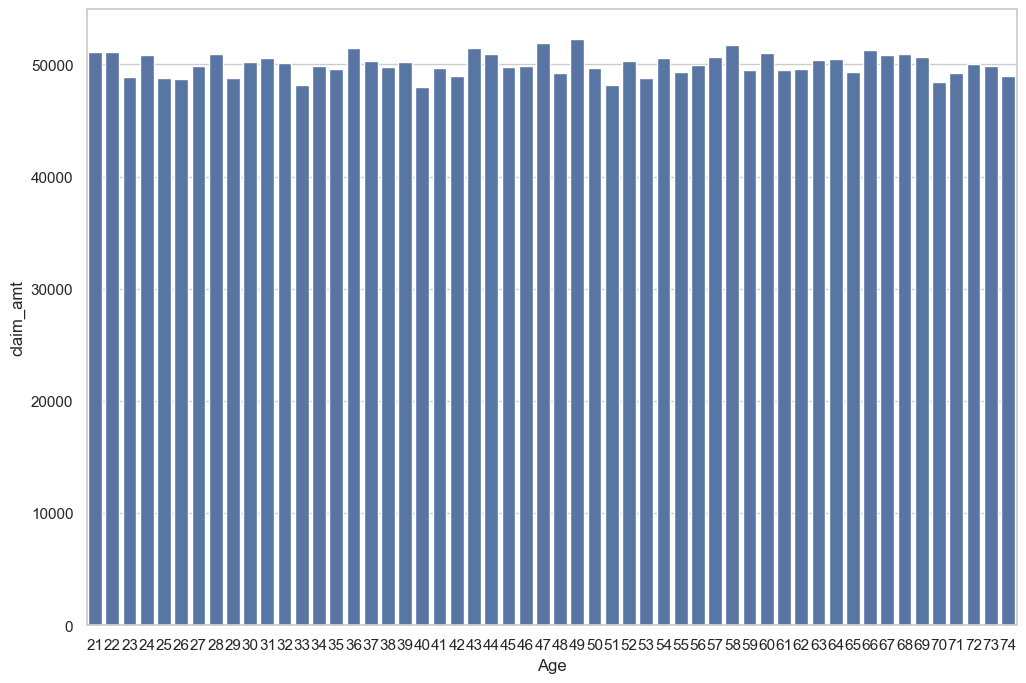

In [49]:
ag= car.groupby(['Age'])['claim_amt'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
sns.barplot(x='Age', y='claim_amt', data=ag)

In [55]:
#Linear regression to check if claim amount can be predicted by claim frequency

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
X_income = car[['claim_freq']]
y_claim_amount = car['claim_amt']

model_income = LinearRegression()
model_income.fit(X_income, y_claim_amount)

slope_income = model_income.coef_[0]
intercept_income = model_income.intercept_

# Calculate R-squared for Household Income vs. Claim Amount
X_income = sm.add_constant(X_income)  # Add a constant term to the independent variable
income_ols_model = sm.OLS(y_claim_amount, X_income).fit()
r_squared_income = income_ols_model.rsquared

print("\nLinear Regression for claim frequency and Claim Amount:")
print("Slope:", slope_income)
print("Intercept:", intercept_income)
print("R-squared:", r_squared_income)
print("P-values:", income_ols_model.pvalues)



Linear Regression for claim frequency and Claim Amount:
Slope: 58.20978777147538
Intercept: 49998.809149376
R-squared: 4.23648947034394e-06
P-values: const         0.000000
claim_freq    0.690046
dtype: float64


#### Claim Frequency vs. Claim Amount:
#### Slope: The slope coefficient for claim frequency is approximately 58.21. This means that for each additional claim in frequency, the predicted claim amount increases by approximately $58.21.
#### Intercept: The intercept is approximately 49998.81. This represents the predicted claim amount when claim frequency is zero.
#### R-squared: The R-squared value is approximately 0.00000424. This indicates that claim frequency explains a very small proportion of the variance in claim amount.
#### P-values: The p-value for the claim frequency coefficient is approximately 0.690. This suggests that claim frequency is not statistically significant in predicting claim amount at the significance level of 0.05.

In [56]:
# Extract the features (independent variables) and target (dependent variable)
X_age = car[['Age']]
y_claim_freq = car['claim_freq']

X_income = car[['household_income']]
y_claim_amount = car['claim_amt']

# Create and fit linear regression models
model_age = LinearRegression()
model_age.fit(X_age, y_claim_freq)

model_income = LinearRegression()
model_income.fit(X_income, y_claim_amount)

# Get coefficients (slope) and intercept
slope_age = model_age.coef_[0]
intercept_age = model_age.intercept_

slope_income = model_income.coef_[0]
intercept_income = model_income.intercept_

# Calculate R-squared for Age vs. Claim Frequency
X_age = sm.add_constant(X_age)  # Add a constant term to the independent variable
age_ols_model = sm.OLS(y_claim_freq, X_age).fit()
r_squared_age = age_ols_model.rsquared

# Calculate R-squared for Household Income vs. Claim Amount
X_income = sm.add_constant(X_income)  # Add a constant term to the independent variable
income_ols_model = sm.OLS(y_claim_amount, X_income).fit()
r_squared_income = income_ols_model.rsquared

print("Linear Regression for Age and Claim Frequency:")
print("Slope:", slope_age)
print("Intercept:", intercept_age)
print("R-squared:", r_squared_age)
print("P-values:", age_ols_model.pvalues)

print("\nLinear Regression for Household Income and Claim Amount:")
print("Slope:", slope_income)
print("Intercept:", intercept_income)
print("R-squared:", r_squared_income)
print("P-values:", income_ols_model.pvalues)

Linear Regression for Age and Claim Frequency:
Slope: -0.0002831813226717945
Intercept: 0.5236615076595048
R-squared: 1.8207809046266732e-05
P-values: const    2.809451e-206
Age       4.083778e-01
dtype: float64

Linear Regression for Household Income and Claim Amount:
Slope: -0.002275783530247734
Intercept: 50363.617321640726
R-squared: 2.1985967744608814e-05
P-values: const               0.00000
household_income    0.36362
dtype: float64


#### Age vs. Claim Frequency:
#### Slope: The slope coefficient for age is approximately -0.00028. This means that for each additional year of age, the predicted claim frequency decreases by approximately 0.00028 claims.
#### Intercept: The intercept is approximately 0.524. This represents the predicted claim frequency when age is zero (which may not be meaningful in this context).
#### R-squared: The R-squared value is approximately 0.0000182. This indicates that age explains a very small proportion of the variance in claim frequency.
#### P-values: The p-value for the age coefficient is approximately 0.408. This suggests that age may not be statistically significant in predicting claim frequency at the conventional significance level of 0.05.

#### Household Income vs. Claim Amount:
#### Slope: The slope coefficient for household income is approximately -0.00228. This means that for each additional unit of household income (e.g., $1), the predicted claim amount decreases by approximately $0.00228.

#### Intercept: The intercept is approximately 50363.62. This represents the predicted claim amount when household income is zero, which may not be meaningful in this context.
#### R-squared: The R-squared value is approximately 0.000022. This indicates that household income explains a very small proportion of the variance in claim amount.
#### P-values: The p-value for the household income coefficient is approximately 0.364. This suggests that household income may not be statistically significant in predicting claim amount at the conventional significance level of 0.05.

In [67]:
#T-TEST to check if marital status is statistically significant  in predicting claim amount 

from scipy.stats import ttest_ind


# Filter the data for married and unmarried individuals (replace 'Married' and 'Unmarried' with your actual categories)
married_claim_amounts = car[car['marital_status'] == 'Married']['claim_amt']
unmarried_claim_amounts = car[car['marital_status'] == 'Single']['claim_amt']

# Perform t-test
t_stat, p_value_ttest = ttest_ind(married_claim_amounts, unmarried_claim_amounts)

print("T-Test:")
print("T-statistic:", t_stat)
print("P-value:", p_value_ttest)



T-Test:
T-statistic: 1.2533132674764083
P-value: 0.21010215252383185


#### Given the p-value of approximately 0.210, which is greater than the typical significance level of 0.05, we cannot reject the null hypothesis. Therefore, based on this analysis, there may not be a statistically significant difference in mean claim amounts between married and unmarried individuals.

### Lets take a look at household income by car maker and what customers with highest income use the cars for

<Axes: xlabel='car_make', ylabel='household_income'>

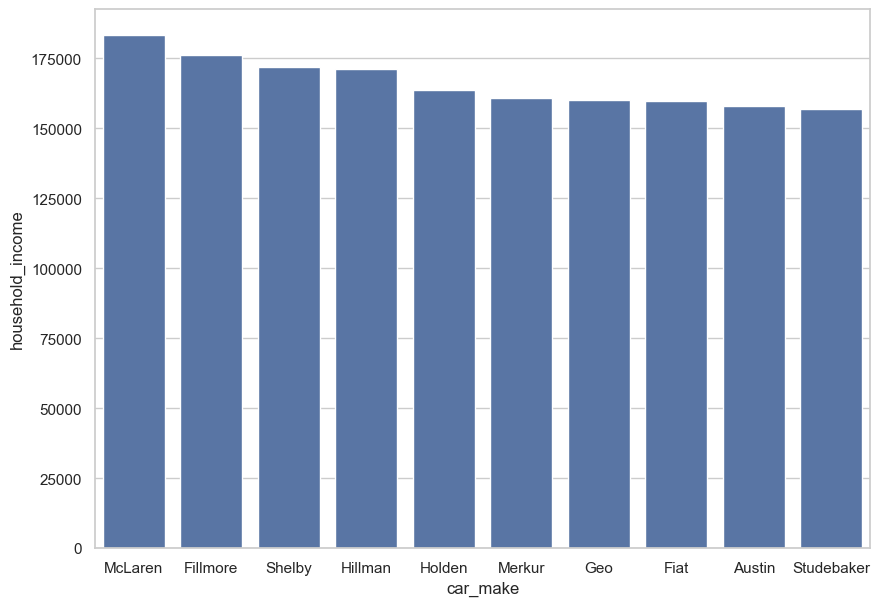

In [59]:
hold= car.groupby(['car_make'])['household_income'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
top_1=hold.nlargest(10, 'household_income')
sns.barplot(x='car_make', y='household_income', data=top_1)

In [60]:
#Top 3 car makers by household income
hol= 'McLaren'
filtt= car[car['car_make']== hol]
zone= filtt['car_use'].value_counts()
zone.head()

car_use
Private       8
Commercial    2
Name: count, dtype: int64

In [61]:
hol= 'Fillmore'
fitt= car[car['car_make']== hol]
zo= fitt['car_use'].value_counts()
zo.head()

car_use
Private    5
Name: count, dtype: int64

In [62]:
shel= 'Shelby'
ft= car[car['car_make']== shel]
bi= ft['car_use'].value_counts()
bi.head()

car_use
Private    9
Name: count, dtype: int64

#### It appears the top 3 car_make are majorly for private use which makes since they will be expensive to maintain

In [63]:
#Overview of customers using the McLaren
speci= 'McLaren'
fifi= car[car['car_make']== speci]
fifi.head(100)

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,birth,date,Age
1445,98-5272203,05/07/1962,Single,Commercial,Male,0,No,High School,McLaren,MP4-12C,Green,2012,0,Rural,58072.27,173545.54,1962,2023,61
2231,37-1304406,11/20/1949,Married,Commercial,Female,0,No,High School,McLaren,MP4-12C,Green,2012,1,Highly Urban,26650.70,198898.49,1949,2023,74
3308,92-3090214,07/11/1962,Seperated,Private,Female,0,No,Bachelors,McLaren,MP4-12C,Violet,2012,0,Suburban,79724.31,218371.69,1962,2023,61
5518,54-9454531,12/27/1962,Single,Private,Female,0,Yes,Masters,McLaren,MP4-12C,Yellow,2012,0,Highly Rural,31980.03,114941.26,1962,2023,61
8199,33-3002863,9/20/1955,Married,Private,Female,0,No,High School,McLaren,MP4-12C,Mauv,2012,0,Rural,28614.36,204034.70,1955,2023,68
10811,57-3830063,04/06/1958,Married,Private,Male,0,No,Bachelors,McLaren,MP4-12C,Yellow,2012,1,Suburban,56475.40,214782.39,1958,2023,65
13510,92-5534398,06/08/1966,Single,Private,Female,0,No,PhD,McLaren,MP4-12C,Yellow,2012,0,Highly Rural,77050.86,201324.49,1966,2023,57
14827,78-2782915,04/08/1963,Single,Private,Male,0,No,Masters,McLaren,MP4-12C,Mauv,2012,0,Highly Urban,8271.06,217919.16,1963,2023,60
16149,87-7671851,12/23/1979,Single,Private,Male,0,No,PhD,McLaren,MP4-12C,Orange,2012,0,Suburban,35037.28,60349.87,1979,2023,44
21884,35-3632519,7/24/1954,Seperated,Private,Female,0,No,Bachelors,McLaren,MP4-12C,Mauv,2012,0,Highly Rural,34331.10,230381.53,1954,2023,69
